# 이미지 복원 실습

함수의 역행을 통해 오염된 이미지를 복구하는 과정 실습

In [1]:
# pickle -> 파일 로딩을 위한 라이브러리
# matplotlib -> 플롯 생성?

import torch
import pickle
import matplotlib.pyplot as plt

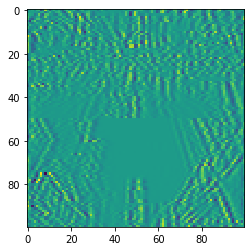

In [4]:
# broken_image -> 이미지 행렬을 랭크1의 벡터로 표현한 텐서 데이터.
# [100, 100] 행렬이 [10000] 모양의 벡터로 표현됨.

broken_image =torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'),encoding = 'latin1'))


# matplotlib으로 시각화.
plt.imshow(broken_image.view(100,100))

In [6]:
# 이미지를 오염시킨 함수 weird_funciton

def weird_function(x, n_iter=5):
    h=x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h=torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [7]:
# 무작위 텐서를 오염된 이미지를 만든 weird_funciton 함수에 넣어 도출된 가설텐서와
# 오염된 이미지 사이의 오차를 구하는 함수를 구현. distance_loss

# dist() 함수는 두 텐서 사이의 거리를 구하는 함수.
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [8]:
# 무작위 값을 가진 텐서 생성. broken_image와 같은 모양과 랭크를 지녀야 함.

random_tensor = torch.randn(10000, dtype=torch.float)

In [9]:
# 경사하강법은 여러 번 반복해서 오차가 최소인 부분을 찾아냄.
# 이 때 한 반복에서 '학습률'을 바탕으로 얼마나 많이, 빠르게 학습하는지를 결정함.

# 학습률 = 0.8
lr = 0.8


# 학습률이 너무 클 때 -> 오차함수의 최소점을 찾지 못하고 지나칠 가능성이 있음.
# 학습률이 너무 작을 때 -> 학습 속도가 느려짐.


In [12]:
for i in range(0,20000):
    random_tensor.requires_grad_(True) # 오차 함수를 random_tensor로 미분을 해야하기 때문에 requires_grad를 True로 설정.
    hypothesis = weird_function(random_tensor) # random_tensor를 weird_function에 통과시켜 오염된 이미지(가설 = hypothesis)를 생성
    loss = distance_loss(hypothesis, broken_image) # 가설과 broken_image의 오차 거리를 구함
    loss.backward() # loss를 random_tensor로 미분. 이 부분은 좀 더 공부해봐야 할 듯. 갑자기 random_tensor로 미분 ..?
    with torch.no_grad(): # 파이토치는 자동 기울기 계산을 수행함. 하지만 지금 실습은 직접 경사하강법을 구현하기 때문에 no_grad() 함수로 비활성화
        random_tensor = random_tensor - lr * random_tensor.grad # loss가 최대점이 되는 곳의 방향..?
        
    if i%1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.375431060791016
Loss at 1000 = 1.1581823825836182
Loss at 2000 = 0.5452581644058228
Loss at 3000 = 0.3743777275085449
Loss at 4000 = 0.2967739701271057
Loss at 5000 = 0.24949337542057037
Loss at 6000 = 0.21532869338989258
Loss at 7000 = 0.18805137276649475
Loss at 8000 = 0.16485054790973663
Loss at 9000 = 0.14425958693027496
Loss at 10000 = 0.12543772161006927
Loss at 11000 = 0.10786806046962738
Loss at 12000 = 0.09121500700712204
Loss at 13000 = 0.07525216042995453
Loss at 14000 = 0.059821706265211105
Loss at 15000 = 0.04481365531682968
Loss at 16000 = 0.0301524568349123
Loss at 17000 = 0.021152442321181297
Loss at 18000 = 0.021165885031223297
Loss at 19000 = 0.021167609840631485


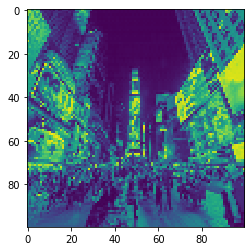

In [13]:
## 복원된 이미지 시각화

plt.imshow(random_tensor.view(100,100).data)